In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IBM2017.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
1,2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2,2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
3,2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
4,2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0
...,...,...,...,...,...,...,...
741,2020-03-26,25.280001,25.670000,25.280001,25.660000,25.624987,44800
742,2020-03-27,25.520000,25.719999,25.520000,25.559999,25.525122,32000
743,2020-03-30,25.440001,25.719999,25.440001,25.650000,25.615000,64400
744,2020-03-31,25.700001,25.700001,25.490000,25.650000,25.615000,129100


> Data Preprocessing

In [4]:
# Converting Date Column to DateTime Format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
1,2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2,2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
3,2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
4,2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0


In [5]:
# Setting Datetime as Index
dt = df.set_index('Date').rename_axis(None)
dt

,Open,High,Low,Close,Adj Close,Volume
2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0
...,...,...,...,...,...,...
2020-03-26,25.280001,25.670000,25.280001,25.660000,25.624987,44800
2020-03-27,25.520000,25.719999,25.520000,25.559999,25.525122,32000
2020-03-30,25.440001,25.719999,25.440001,25.650000,25.615000,64400
2020-03-31,25.700001,25.700001,25.490000,25.650000,25.615000,129100


In [6]:
# Setting Datetime as Index
dt = df.set_index('Date').rename_axis(None)
dt

,Open,High,Low,Close,Adj Close,Volume
2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0
...,...,...,...,...,...,...
2020-03-26,25.280001,25.670000,25.280001,25.660000,25.624987,44800
2020-03-27,25.520000,25.719999,25.520000,25.559999,25.525122,32000
2020-03-30,25.440001,25.719999,25.440001,25.650000,25.615000,64400
2020-03-31,25.700001,25.700001,25.490000,25.650000,25.615000,129100


In [7]:
# Standardizing the Data
from sklearn.preprocessing import StandardScaler

# Initializing Standard Scaler
scaler = StandardScaler()

# Applying Standard Scaler to only necessary features
scaled_data = scaler.fit_transform(dt[['Close']])
scaled_df = pd.DataFrame(scaled_data, columns=['Close'])
scaled_df.index = dt.index
scaled_df

,Close
2017-04-17,-0.548213
2017-04-18,-0.548213
2017-04-19,-0.274496
2017-04-20,-0.299380
2017-04-21,-0.299380
...,...
2020-03-26,0.745717
2020-03-27,0.496883
2020-03-30,0.720833
2020-03-31,0.720833


> 
Model Building
ARIMA

> An ARIMA model is characterized by 3 terms (p, d, q):

>     p is the order of the AR term. It refers to the number of lags to be used as predictors.
    d is the number of differencing required to make the time series stationary
    q is the order of the MA term. It refers to the number of lagged forecast errors that should go into the ARIMA model.

> As seen per the parameters required by the model, any stationary time series can be modeled with ARIMA models. Therefore we have to check if our dataset have stationarity or not.
Stationarity

> Subtract the previous value from the current value. Now if we just difference once, we might not get a stationary series so we might need to do that multiple times.

> And the minimum number of differencing operations needed to make the series stationary needs to be imputed into our ARIMA model.
ADF test

> We will use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary.
Hypothesis Test: To evaluate Stationarity

> Null Hypothesis: Time series is non-stationary.
Alternative Hypothesis: Time series is Stationary.

> So, if the p-value of the test is less than the significance level of 0.05, then we can reject the null hypothesis and infer that the time series is indeed stationary.


In [8]:
# Hypothesis Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(scaled_df)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("\nAccept Null Hypothesis: Data is non-stationary")
else:
    print("\nReject Null Hypothesis: Data is stationary")

ADF Statistic: -1.5486721323342658
p-value: 0.5093114152482312

Accept Null Hypothesis: Data is non-stationary


In [10]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 98.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


> Getting Order of Differencing

In [11]:
from pmdarima.arima.utils import ndiffs

print('Differencing (d) =', ndiffs(scaled_df, test='adf'))

Differencing (d) = 1


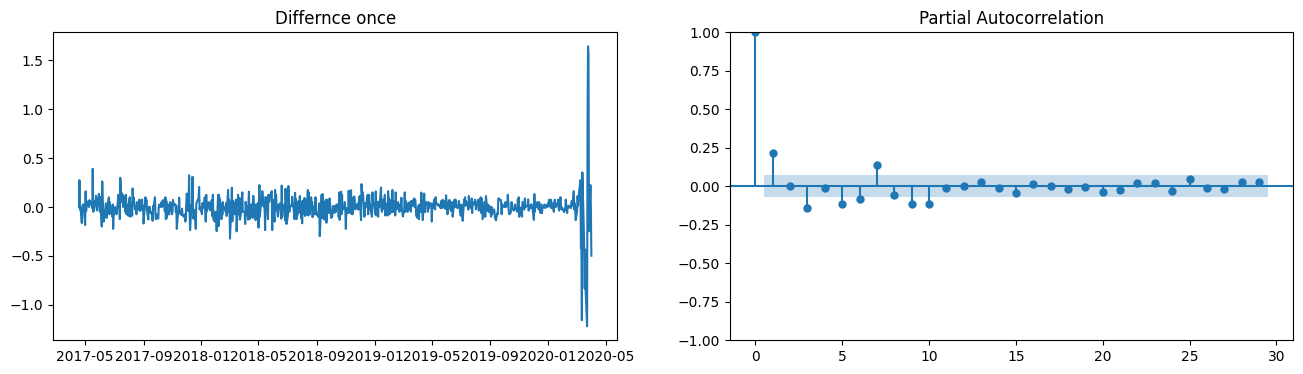

In [12]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

diff = scaled_df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Differnce once')
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);

> We can observe that the PACF lag (q) 2 is significant as it is above the significance line.

> Therefore, we will consider q = 2.
Getting order of Moving Average.

> p is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA model.

> We can look at the ACF plot for the number of MA terms.


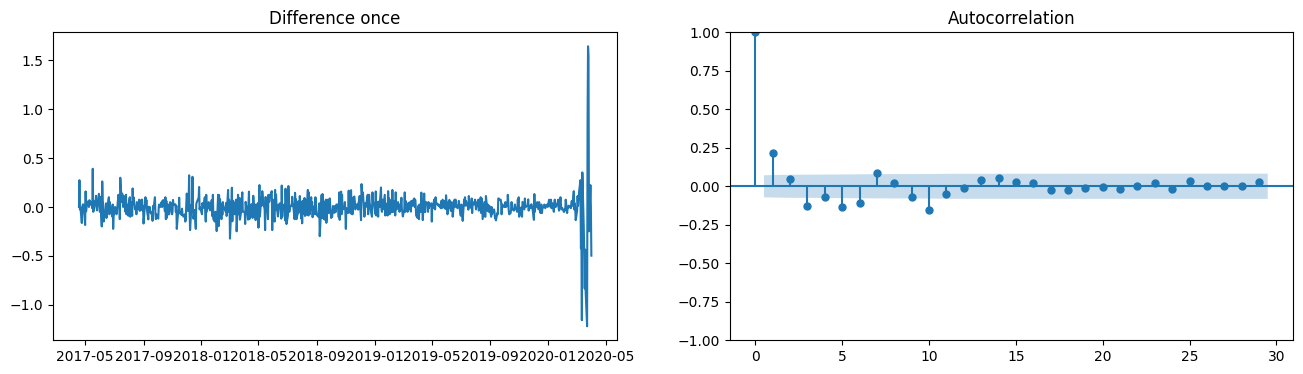

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
diff = scaled_df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

In [14]:
# Splitting the dataset
train_size = int(len(scaled_df) * 0.80) # 80% split

train, test = scaled_df.iloc[:train_size], scaled_df[train_size:]

In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1,1,2)) # order=(p,d,q)
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  596
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 585.566
Date:                Mon, 19 Aug 2024   AIC                          -1163.133
Time:                        09:28:36   BIC                          -1145.578
Sample:                             0   HQIC                         -1156.297
                                - 596                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9457      0.049     19.240      0.000       0.849       1.042
ma.L1         -1.1557      0.056    -20.494      0.000      -1.266      -1.045
ma.L2          0.2274      0.040      5.661      0.000       0.149       0.306
sigma2         0.0082      0.000     21.869      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                37.92
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

> Making Predictions

In [17]:
predictions = model_fit.forecast(steps=int(len(test)))

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.5102738941715971
Mean Squared Error: 0.6973650166748111


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


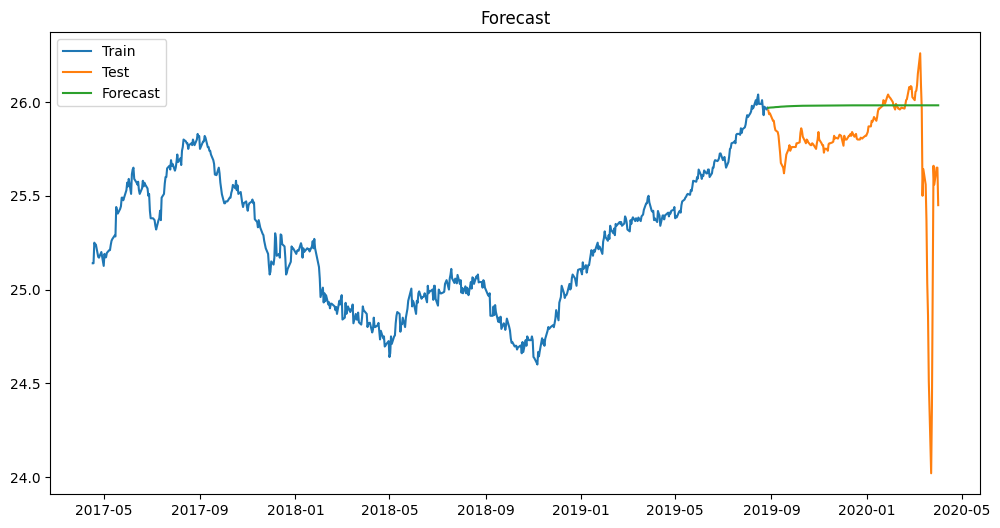

In [19]:
forecast = model_fit.forecast(steps=int(len(test)))
forecast_values = scaler.inverse_transform(forecast.values.reshape(-1,1))
forecasts_df = pd.DataFrame(forecast_values, index=test.index, columns=['Forecast'])

original_train = dt.iloc[:train_size]
original_test = dt.iloc[train_size:]


# Plotting forecast
plt.figure(figsize=(12, 6))
plt.plot(original_train.index, original_train['Close'], label='Train')
plt.plot(original_test.index, original_test['Close'], label='Test')
plt.plot(forecasts_df.index, forecasts_df['Forecast'], label='Forecast')
plt.title('Forecast')
plt.legend()
plt.show()

> 
Model Evaluation

> Checking the residual to ensure they behave like white noise.


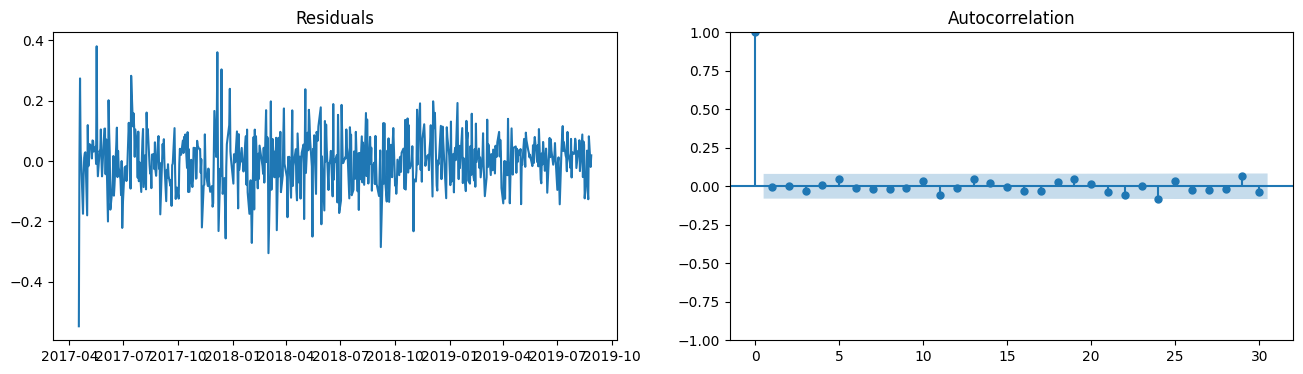

In [20]:
residuals = model_fit.resid

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(residuals)
ax1.set_title('Residuals')
ax2.set_ylim(0,1)
plot_acf(residuals, lags=30, ax=ax2);

In [21]:
model = ARIMA(scaled_df, order=(1,1,2)) # order=(p,d,q)
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  746
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 375.358
Date:                Mon, 19 Aug 2024   AIC                           -742.717
Time:                        09:31:21   BIC                           -724.263
Sample:                             0   HQIC                          -735.604
                                - 746                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5174      0.067     -7.740      0.000      -0.648      -0.386
ma.L1          0.7651      0.066     11.628      0.000       0.636       0.894
ma.L2          0.2600      0.016     15.871      0.000       0.228       0.292
sigma2         0.0214      0.000     65.282      0.000       0.021       0.022
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):             26193.42
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               3.59   Skew:                             1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


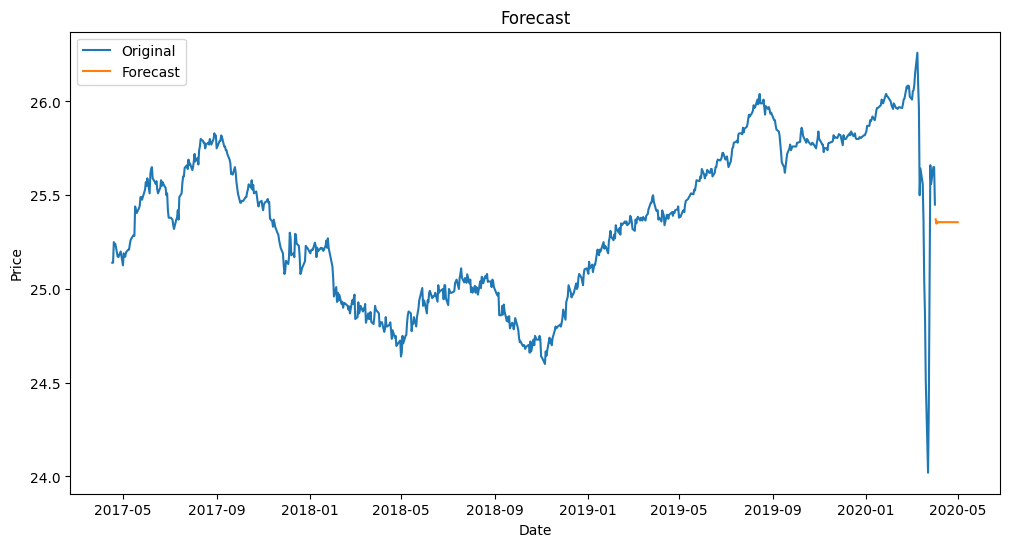

In [22]:
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
forecast_values = scaler.inverse_transform(forecast.values.reshape(-1,1))

forecasts_dates = pd.date_range(
    start = dt.index[-1] + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)
forecasts_df = pd.DataFrame(forecast_values, index=forecasts_dates, columns=['Forecast'])

# Plotting forecast
plt.figure(figsize=(12, 6))
plt.plot(dt.index, dt['Close'], label='Original')
plt.plot(forecasts_df.index, forecasts_df['Forecast'], label='Forecast')
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
import pmdarima as pm

In [24]:
# Performing grid search for ARIMA

optimized_model = pm.auto_arima(
    train,
    start_p=1,
    start_q=1,
    test='adf', # using adf test to find optimal 'd'
    max_p=5,
    max_q=5,
    m=1,
    start_P=0,
    seasonal=False,
    d=None,
    D=0,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

optimized_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1160.172, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1135.927, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1161.812, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1159.355, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1137.096, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1160.187, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1158.267, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1162.536, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1160.969, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1160.946, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1160.037, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1163.971, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-1157.044, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1161.900, Time=0.80 sec
 ARIMA(1,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  596
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 585.985
Date:                Mon, 19 Aug 2024   AIC                          -1163.971
Time:                        09:32:30   BIC                          -1146.417
Sample:                             0   HQIC                         -1157.135
                                - 596                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7296      0.064     11.453      0.000       0.605       0.854
ar.L2          0.2313      0.041      5.622      0.000       0.151       0.312
ma.L1         -0.9434      0.047    -19.929      0.000      -1.036      -0.851
sigma2         0.0082      0.000     21.868      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                38.60
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
order = optimized_model.order
print(f'Best ARIMA order (p,d,q): {order}')

Best ARIMA order (p,d,q): (2, 1, 1)


> Building Model using Optimized ARIMA Model

In [26]:
final_model = ARIMA(scaled_df, order=(0,1,1)) # order=(p,d,q)
final_model_fit = final_model.fit()
final_model_fit.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  746
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 367.088
Date:                Mon, 19 Aug 2024   AIC                           -730.177
Time:                        09:33:31   BIC                           -720.950
Sample:                             0   HQIC                          -726.621
                                - 746                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1952      0.009     20.874      0.000       0.177       0.214
sigma2         0.0219      0.000     64.172      0.000       0.021       0.023
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):             31019.06
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               3.84   Skew:                             1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

> Making Forecasts

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


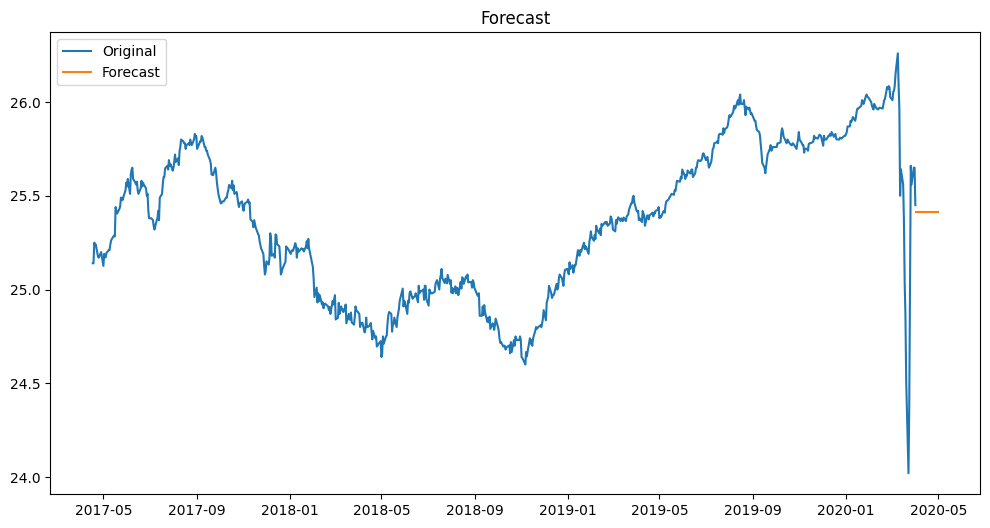

In [27]:
forecast_steps = 30
forecast = final_model_fit.forecast(steps=forecast_steps)
forecast_values = scaler.inverse_transform(forecast.values.reshape(-1,1))

forecasts_dates = pd.date_range(
    start = dt.index[-1] + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)
forecasts_df = pd.DataFrame(forecast_values, index=forecasts_dates, columns=['Forecast'])

# Plotting forecast
plt.figure(figsize=(12, 6))
plt.plot(dt.index, dt['Close'], label='Original')
plt.plot(forecasts_df.index, forecasts_df['Forecast'], label='Forecast')
plt.title('Forecast')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>